In [69]:
import os
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing # for the LabelEncoder
import datetime as dt
import numpy as np


In [70]:
pd.set_option('display.max_columns', None)

#### Stock Price Data

In [71]:
# Preparing Stock price data 
path_="Raw Data/Stock Data"
outputpath="Output Data/"
# setting path of the stock data files and collecting all the files names from the directory
files=[file for file in os.listdir(path_) if file.endswith(".csv")]
# creating dataframe to store the data from all tickers
Stock_price_data=pd.DataFrame()
# itterating through each file in the folder
for file in files:
    # setting the complete file path
    file_path=os.path.join(path_,file)
    # removing csv from the file name
    filename=file.replace(".csv",'')
    # spliting file name by "-"  and getting the symbol and name of the company
    symbol,name=filename.split('-',maxsplit=2)
    # reading each file
    tempdf=pd.read_csv(file_path)
    tempdf['Date']=pd.to_datetime(tempdf['Date'])
    # creating 2 new colums  symbol and name
    tempdf[['Symbol','Name']]=symbol,name

    # generating list of first date of each month available in the dataset
    expected_dates = pd.date_range(start=tempdf['Date'].min(), end=tempdf['Date'].max(), freq='MS')
    # Cross checking with stock data to check for missing first day of the month
    missing_dates = expected_dates[~expected_dates.isin(tempdf['Date'])]
    if not missing_dates.empty:
        # itterating through each missing date 
        for missing_date in missing_dates:
            # adding new rows with missing date data and filling with symbol and name
            tempdf.loc[tempdf.shape[0]] =  (missing_date,'','','','','',symbol,name)

    # if this is the first file then copy the dataframe to main dataframe
    if Stock_price_data.empty:
        Stock_price_data=tempdf
    else:
        # if the file is not the first in the list concate current file to main dataframe
        Stock_price_data=pd.concat([Stock_price_data,tempdf],ignore_index=True)
# converting date to datetime format  
Stock_price_data['Date']=pd.to_datetime(Stock_price_data['Date'])

# changing the order of the columns 
Stock_price_data=Stock_price_data[['Date',  'Symbol','Name','Close/Last', 'Volume', 'Open', 'High', 'Low',]]
Stock_price_data.sort_values(['Symbol','Date'],inplace=True)
Stock_price_data['Volume'].replace('   ','',inplace=True)
# Stock_price_data['Volume']=Stock_price_data['Volume'].astype('float')

Stock_price_data['Volume Lagged']=Stock_price_data['Volume'].shift(1)
# Stock_price_data.to_csv(outputpath+"Stock Data.CSV",index=False)     
#  
print(Stock_price_data['Date'].max())
print(Stock_price_data['Date'].min())

C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\3369270493.py:18: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tempdf['Date']=pd.to_datetime(tempdf['Date'])


2023-12-12 00:00:00
2013-07-15 00:00:00


In [72]:
tempdf

,Date,Close/Last,Volume,Open,High,Low,Symbol,Name
0,2023-07-14,$100.94,28181920,$104.05,$104.05,$100.53,XOM,Exxon
1,2023-07-13,$104.54,26826840,$105.97,$106.23,$103.32,XOM,Exxon
2,2023-07-12,$106.49,13238240,$107.00,$107.65,$106.13,XOM,Exxon
3,2023-07-11,$105.97,12581080,$105.26,$106.16,$104.81,XOM,Exxon
4,2023-07-10,$104.69,14877620,$102.97,$104.75,$102.75,XOM,Exxon
...,...,...,...,...,...,...,...,...
2555,2022-05-01,,,,,,XOM,Exxon
2556,2022-10-01,,,,,,XOM,Exxon
2557,2023-01-01,,,,,,XOM,Exxon
2558,2023-04-01,,,,,,XOM,Exxon


Oil Price

In [73]:
# Reading Crude Oil Data
Oil_price=pd.read_csv("Raw Data\Crude Oil.csv")
# Converting to Date format
Oil_price['Date']=pd.to_datetime(Oil_price['Date'])
print(Oil_price['Date'].max())
print(Oil_price['Date'].min())

# creating placeholder for columns names from Oil price database
columns=[]
# renaming columns names of oil price data with "Oil" as prefix
for i in range(0,len(Oil_price.columns)):
    columns.append("Oil-"+Oil_price.columns[i])
Oil_price.columns=columns

Oil_price['Oil-Date']=pd.to_datetime(Oil_price['Oil-Date'])
Oil_price.rename(columns={'Oil-Date':'Date'},inplace=True)

Oil_price.sort_values('Date',inplace=True)
Oil_price['Oil-Volume Lagged']=Oil_price['Oil-Volume'].shift(1)

# Merging Stock data and Oil Data 
Main_data=Stock_price_data.merge(Oil_price,on='Date',how='left')

2023-07-14 00:00:00
2013-07-16 00:00:00


In [74]:
Oil_price

,Date,Oil-Close/Last,Oil-Volume,Oil-Open,Oil-High,Oil-Low,Oil-Volume Lagged
2538,2013-07-16,106.00,225610.0,106.44,107.18,105.66,NaN
2537,2013-07-17,106.48,237263.0,105.78,106.60,105.11,225610.0
2536,2013-07-18,108.04,142786.0,106.56,108.43,106.15,237263.0
2535,2013-07-19,108.05,75254.0,108.12,109.32,107.48,142786.0
2534,2013-07-22,106.91,3536.0,108.34,107.20,106.75,75254.0
...,...,...,...,...,...,...,...
4,2023-07-10,72.99,279846.0,73.86,74.15,72.67,340596.0
3,2023-07-11,74.83,300150.0,73.19,74.96,72.98,279846.0
2,2023-07-12,75.75,330342.0,74.83,76.15,74.67,300150.0
1,2023-07-13,76.89,354764.0,75.85,77.33,75.32,330342.0


Intrest Rate

In [75]:
# reading intrest rates data
interest_rates=pd.read_excel(r'Raw Data\FEDFUNDS.xls')
interest_rates['observation_date']=pd.to_datetime(interest_rates['observation_date'])
print(interest_rates['observation_date'].min())
print(interest_rates['observation_date'].max())
# renaming intrest rate date column to match the main dataset
interest_rates.rename(columns={'observation_date':'Date'},inplace=True)
# merging intrest rate with main dataset
Main_data=   Main_data.merge(interest_rates,on='Date',how='left')

2012-02-01 00:00:00
2023-07-01 00:00:00


US Unemployment Rate

In [76]:
Unemployment_rate=pd.read_excel("Raw Data/US Unemployment Rate.xls",skiprows=10)
Unemployment_rate['observation_date']=pd.to_datetime(Unemployment_rate['observation_date'])
print(Unemployment_rate['observation_date'].min())
print(Unemployment_rate['observation_date'].max())
Unemployment_rate.rename(columns={'observation_date':'Date','UNRATE':'Unemployment Rate'},inplace=True)
Main_data=Main_data.merge(Unemployment_rate,on='Date',how='left')
Main_data.head()

1948-01-01 00:00:00
2023-11-01 00:00:00


,Date,Symbol,Name,Close/Last,Volume,Open,High,Low,Volume Lagged,Oil-Close/Last,Oil-Volume,Oil-Open,Oil-High,Oil-Low,Oil-Volume Lagged,FEDFUNDS,Unemployment Rate
0,2013-07-15,BKR,Baker Hughes,48.91,2342300,49.18,49.5,48.860001,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-07-16,BKR,Baker Hughes,48.689999,3226700,48.880001,49.049999,48.299999,2342300,106.00,225610.0,106.44,107.18,105.66,NaN,NaN,NaN
2,2013-07-17,BKR,Baker Hughes,48.900002,3195300,48.77,49.25,48.580002,3226700,106.48,237263.0,105.78,106.60,105.11,225610.0,NaN,NaN
3,2013-07-18,BKR,Baker Hughes,49.080002,3828500,49.0,49.48,48.98,3195300,108.04,142786.0,106.56,108.43,106.15,237263.0,NaN,NaN
4,2013-07-19,BKR,Baker Hughes,47.799999,11261200,47.740002,48.110001,46.849998,3828500,108.05,75254.0,108.12,109.32,107.48,142786.0,NaN,NaN


US GDP

# reading GDP data
GDP=pd.read_excel('Raw Data/US GDP.xlsx')
# Creating a full date column
GDP['Date']=GDP['Year'].astype('str')+"/1"+"/1"
# converting to dateformat
GDP['Date']=pd.to_datetime(GDP['Date'])
# removing all the extra charactors 
GDP['GDP'] = GDP['GDP'].replace({'\$': '', 'B': '', ',': ''}, regex=True)
# merging with main dataset
Main_data=Main_data.merge(GDP[['Date','GDP']],on='Date',how='left')

OGEMS Companies Financial Data

In [78]:
# reading company financial data 
company_finance_data=pd.read_excel('Raw Data\Company Finance.xlsx')
company_finance_data['Date']=pd.to_datetime(company_finance_data['Date'])
print(company_finance_data['Date'].max())
print(company_finance_data['Date'].min())
# converting symbol column to string type for merging 
Main_data['Symbol']=Main_data['Symbol'].astype('str')
# elemenating any spaces in the symbol column to get better merger
Main_data['Symbol']=Main_data['Symbol'].str.replace(' ','')

# converting symbol column to string type 
company_finance_data['Symbol']=company_finance_data['Symbol'].astype('str')
# removing any space in symbol column for a better merge
company_finance_data['Symbol']=company_finance_data['Symbol'].str.replace(' ','')

# merging company financial data to main data
Main_data=Main_data.merge(company_finance_data,on=['Symbol','Date'],how='left')
Main_data.head()

2023-09-30 00:00:00
2009-03-31 00:00:00


,Date,Symbol,Name,Close/Last,Volume,Open,High,Low,Volume Lagged,Oil-Close/Last,Oil-Volume,Oil-Open,Oil-High,Oil-Low,Oil-Volume Lagged,FEDFUNDS,Unemployment Rate,GDP,EPS,Qtr Revenue in millions,GP in Millions,operating income in millions,EBIDTA in millions,Net income in millions,Shares Outstanding
0,2013-07-15,BKR,Baker Hughes,48.91,2342300,49.18,49.5,48.860001,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-07-16,BKR,Baker Hughes,48.689999,3226700,48.880001,49.049999,48.299999,2342300,106.00,225610.0,106.44,107.18,105.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-07-17,BKR,Baker Hughes,48.900002,3195300,48.77,49.25,48.580002,3226700,106.48,237263.0,105.78,106.60,105.11,225610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-07-18,BKR,Baker Hughes,49.080002,3828500,49.0,49.48,48.98,3195300,108.04,142786.0,106.56,108.43,106.15,237263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-07-19,BKR,Baker Hughes,47.799999,11261200,47.740002,48.110001,46.849998,3828500,108.05,75254.0,108.12,109.32,107.48,142786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Global Steel Production

In [79]:
# reading steel production data and skipping first 10 row of header values
steel_production=pd.read_excel("Raw Data\Raw Steel production.xls",skiprows=10)
# converting observation date to datetime format
steel_production['observation_date']=pd.to_datetime(steel_production['observation_date'])
print(steel_production['observation_date'].min())
print(steel_production['observation_date'].max())
# Renaming columns
steel_production.rename(columns={'observation_date':'Date','IPN3311A2RS':'Steel Production'},inplace=True)
# Merging steel production with main data 
Main_data=Main_data.merge(steel_production,on='Date',how='left')
Main_data.head()

1972-01-01 00:00:00
2023-09-01 00:00:00


,Date,Symbol,Name,Close/Last,Volume,Open,High,Low,Volume Lagged,Oil-Close/Last,Oil-Volume,Oil-Open,Oil-High,Oil-Low,Oil-Volume Lagged,FEDFUNDS,Unemployment Rate,GDP,EPS,Qtr Revenue in millions,GP in Millions,operating income in millions,EBIDTA in millions,Net income in millions,Shares Outstanding,Steel Production
0,2013-07-15,BKR,Baker Hughes,48.91,2342300,49.18,49.5,48.860001,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-07-16,BKR,Baker Hughes,48.689999,3226700,48.880001,49.049999,48.299999,2342300,106.00,225610.0,106.44,107.18,105.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-07-17,BKR,Baker Hughes,48.900002,3195300,48.77,49.25,48.580002,3226700,106.48,237263.0,105.78,106.60,105.11,225610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-07-18,BKR,Baker Hughes,49.080002,3828500,49.0,49.48,48.98,3195300,108.04,142786.0,106.56,108.43,106.15,237263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-07-19,BKR,Baker Hughes,47.799999,11261200,47.740002,48.110001,46.849998,3828500,108.05,75254.0,108.12,109.32,107.48,142786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Feature Engineering 

Yield Curve Data

In [80]:
# reading yield curve data
yield_curve=pd.read_excel('Raw Data/Yield Curve.xlsx')
# calculating Yield curve ratio based on Arturo Estrella method 
yield_curve['YC Ratio arturo']=yield_curve['10year']-yield_curve['3month']
# calculating Yield curve ratio based on wallstreet method 
yield_curve['YC Ratio Wallstreet']=yield_curve['10year']-yield_curve['2year']
# dropping other columns from the datset
yield_curve=yield_curve[['Date','YC Ratio arturo','YC Ratio Wallstreet']]
# converting date to datetime for merging
yield_curve['Date']=pd.to_datetime(yield_curve['Date'])
# merging yield curve ratio data with main dataset
Main_data=Main_data.merge(yield_curve,on='Date',how='left')
Main_data.head()

,Date,Symbol,Name,Close/Last,Volume,Open,High,Low,Volume Lagged,Oil-Close/Last,Oil-Volume,Oil-Open,Oil-High,Oil-Low,Oil-Volume Lagged,FEDFUNDS,Unemployment Rate,GDP,EPS,Qtr Revenue in millions,GP in Millions,operating income in millions,EBIDTA in millions,Net income in millions,Shares Outstanding,Steel Production,YC Ratio arturo,YC Ratio Wallstreet
0,2013-07-15,BKR,Baker Hughes,48.91,2342300,49.18,49.5,48.860001,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.53,2.23
1,2013-07-16,BKR,Baker Hughes,48.689999,3226700,48.880001,49.049999,48.299999,2342300,106.00,225610.0,106.44,107.18,105.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.52,2.21
2,2013-07-17,BKR,Baker Hughes,48.900002,3195300,48.77,49.25,48.580002,3226700,106.48,237263.0,105.78,106.60,105.11,225610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.49,2.20
3,2013-07-18,BKR,Baker Hughes,49.080002,3828500,49.0,49.48,48.98,3195300,108.04,142786.0,106.56,108.43,106.15,237263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.53,2.24
4,2013-07-19,BKR,Baker Hughes,47.799999,11261200,47.740002,48.110001,46.849998,3828500,108.05,75254.0,108.12,109.32,107.48,142786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.47,2.18


Date Convertion

In [81]:
Main_data['Year']=Main_data['Date'].dt.year
Main_data['Month']=Main_data['Date'].dt.month
Main_data['Day']=Main_data['Date'].dt.day

Data Cleaning

In [82]:
# Main_data.drop(columns=['Name','Volume', 'Open', 'High', 'Low',
#        'Oil-Close/Last', 'Oil-Volume', 'Oil-High', 'Oil-Low'],axis=1,inplace=True)

# Main_data.drop(columns=['Name','Volume','High', 'Low',
#          'Oil-High', 'Oil-Low'],axis=1,inplace=True)

In [83]:
Main_data

,Date,Symbol,Name,Close/Last,Volume,Open,High,Low,Volume Lagged,Oil-Close/Last,Oil-Volume,Oil-Open,Oil-High,Oil-Low,Oil-Volume Lagged,FEDFUNDS,Unemployment Rate,GDP,EPS,Qtr Revenue in millions,GP in Millions,operating income in millions,EBIDTA in millions,Net income in millions,Shares Outstanding,Steel Production,YC Ratio arturo,YC Ratio Wallstreet,Year,Month,Day
0,2013-07-15,BKR,Baker Hughes,48.91,2342300,49.18,49.5,48.860001,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.53,2.23,2013,7,15
1,2013-07-16,BKR,Baker Hughes,48.689999,3226700,48.880001,49.049999,48.299999,2342300,106.00,225610.0,106.44,107.18,105.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.52,2.21,2013,7,16
2,2013-07-17,BKR,Baker Hughes,48.900002,3195300,48.77,49.25,48.580002,3226700,106.48,237263.0,105.78,106.60,105.11,225610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.49,2.20,2013,7,17
3,2013-07-18,BKR,Baker Hughes,49.080002,3828500,49.0,49.48,48.98,3195300,108.04,142786.0,106.56,108.43,106.15,237263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.53,2.24,2013,7,18
4,2013-07-19,BKR,Baker Hughes,47.799999,11261200,47.740002,48.110001,46.849998,3828500,108.05,75254.0,108.12,109.32,107.48,142786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.47,2.18,2013,7,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,2023-07-10,shel,Shell,$59.92,3409529,$59.76,$60.295,$59.71,4802897,72.99,279846.0,73.86,74.15,72.67,340596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.47,-0.84,2023,7,10
23142,2023-07-11,shel,Shell,$60.87,4291898,$60.20,$60.89,$60.20,3409529,74.83,300150.0,73.19,74.96,72.98,279846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.50,-0.89,2023,7,11
23143,2023-07-12,shel,Shell,$61.79,4888022,$62.07,$62.30,$61.60,4291898,75.75,330342.0,74.83,76.15,74.67,300150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.61,-0.86,2023,7,12
23144,2023-07-13,shel,Shell,$62.11,5043050,$62.31,$62.60,$61.9201,4888022,76.89,354764.0,75.85,77.33,75.32,330342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.71,-0.83,2023,7,13


In [84]:
# Sorting main dataset by date
Main_data=Main_data.sort_values(by=['Symbol','Date'],ascending=True).reset_index(drop=True)
# selecting the columns to forward fill data
columns_to_fill = ['FEDFUNDS', 
'Unemployment Rate',
 'GDP',
 'EPS',
 'Qtr Revenue in millions',
 'GP in Millions',
 'operating income in millions',
 'EBIDTA in millions',
 'Net income in millions',
 'Shares Outstanding',
 'YC Ratio arturo',
 'YC Ratio Wallstreet',
 'Steel Production'
 ]

# Forward Filling the monthly and quartarly data
Main_data[columns_to_fill] = Main_data[columns_to_fill].fillna(method='ffill')


# selecting columns to clean
columns_to_clean = [
 'Close/Last', 
 'EPS',
 'Qtr Revenue in millions',
 'GP in Millions',
 'operating income in millions',
 'EBIDTA in millions',
 'Net income in millions',
 'Open',
 'Low',
 'High']

# converting the selected columns to string type
Main_data[columns_to_clean]=Main_data[columns_to_clean].astype('str')
# removing extra charactors from the values
Main_data[columns_to_clean] = Main_data[columns_to_clean].applymap(lambda x: x.replace('$', ''))
Main_data[columns_to_clean] = Main_data[columns_to_clean].applymap(lambda x: x.replace(',', ''))
Main_data[columns_to_clean] = Main_data[columns_to_clean].applymap(lambda x: x.replace(' ', ''))


C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\275081572.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Main_data[columns_to_fill] = Main_data[columns_to_fill].fillna(method='ffill')
C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\275081572.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Main_data[columns_to_clean] = Main_data[columns_to_clean].applymap(lambda x: x.replace('$', ''))
C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\275081572.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Main_data[columns_to_clean] = Main_data[columns_to_clean].applymap(lambda x: x.replace(',', ''))
C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\275081572.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Main_data[columns_to_clean] = Main_data[columns_to_clean].applymap(la

### Dropping rows without values 

In [85]:
# Dropping rows without values 
print("Before Droping Rows",Main_data.shape)

Main_data.dropna(inplace=True)

Main_data=Main_data[Main_data['Volume Lagged']!='']

print("After Droping NA Rows",Main_data.shape)

Main_data=Main_data[Main_data['Close/Last']!='']

print("After Droping Close NA Rows",Main_data.shape)


Before Droping Rows (23146, 31)
After Droping NA Rows (21974, 31)
After Droping Close NA Rows (21974, 31)


In [86]:
Main_data

,Date,Symbol,Name,Close/Last,Volume,Open,High,Low,Volume Lagged,Oil-Close/Last,Oil-Volume,Oil-Open,Oil-High,Oil-Low,Oil-Volume Lagged,FEDFUNDS,Unemployment Rate,GDP,EPS,Qtr Revenue in millions,GP in Millions,operating income in millions,EBIDTA in millions,Net income in millions,Shares Outstanding,Steel Production,YC Ratio arturo,YC Ratio Wallstreet,Year,Month,Day
123,2014-01-03,BKR,Baker Hughes,53.59,3195400,54.150002,54.450001,53.43,3475200,95.44,196347.0,95.47,95.74,93.86,234933.0,0.07,6.6,17550.68,0.56,5860,974,482,918,248,444.0,106.6961,2.94,2.60,2014,1,3
124,2014-01-06,BKR,Baker Hughes,53.400002,2940300,53.950001,53.959999,53.02,3195400,93.43,172625.0,94.18,94.59,93.20,196347.0,0.07,6.6,17550.68,0.56,5860,974,482,918,248,444.0,106.6961,2.93,2.58,2014,1,6
125,2014-01-07,BKR,Baker Hughes,52.790001,4494200,52.75,52.860001,52.259998,2940300,93.67,159884.0,93.60,94.22,93.35,172625.0,0.07,6.6,17550.68,0.56,5860,974,482,918,248,444.0,106.6961,2.92,2.56,2014,1,7
126,2014-01-08,BKR,Baker Hughes,52.209999,5122500,52.869999,52.869999,51.669998,4494200,92.33,215605.0,93.96,94.18,92.26,159884.0,0.07,6.6,17550.68,0.56,5860,974,482,918,248,444.0,106.6961,2.96,2.58,2014,1,8
127,2014-01-09,BKR,Baker Hughes,51.82,3258300,52.5,52.5,51.389999,5122500,91.66,227577.0,92.58,92.93,91.24,215605.0,0.07,6.6,17550.68,0.56,5860,974,482,918,248,444.0,106.6961,2.93,2.53,2014,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,2023-07-10,shel,Shell,59.92,3409529,59.76,60.295,59.71,4802897,72.99,279846.0,73.86,74.15,72.67,340596.0,5.12,3.5,25462.70,0.92,76020,18043,6560,14432,3134,3407.0,92.6419,-1.47,-0.84,2023,7,10
23142,2023-07-11,shel,Shell,60.87,4291898,60.20,60.89,60.20,3409529,74.83,300150.0,73.19,74.96,72.98,279846.0,5.12,3.5,25462.70,0.92,76020,18043,6560,14432,3134,3407.0,92.6419,-1.50,-0.89,2023,7,11
23143,2023-07-12,shel,Shell,61.79,4888022,62.07,62.30,61.60,4291898,75.75,330342.0,74.83,76.15,74.67,300150.0,5.12,3.5,25462.70,0.92,76020,18043,6560,14432,3134,3407.0,92.6419,-1.61,-0.86,2023,7,12
23144,2023-07-13,shel,Shell,62.11,5043050,62.31,62.60,61.9201,4888022,76.89,354764.0,75.85,77.33,75.32,330342.0,5.12,3.5,25462.70,0.92,76020,18043,6560,14432,3134,3407.0,92.6419,-1.71,-0.83,2023,7,13


### Converting value columns to float

In [87]:
# selecting only value columns
value_columns=['Close/Last', 'Oil-Open', 'FEDFUNDS',
       'Unemployment Rate', 'GDP', 'EPS', 'Qtr Revenue in millions',
       'GP in Millions', 'operating income in millions', 'EBIDTA in millions',
       'Net income in millions',  'YC Ratio arturo','Shares Outstanding',
       'YC Ratio Wallstreet', 'Steel Production','Volume','Volume Lagged','Open','Oil-Volume','Oil-Volume Lagged','High','Low','Oil-Close/Last','Oil-High', 'Oil-Low']

# converting value columns to float
Main_data[value_columns]=Main_data[value_columns].astype('float')
for col in value_columns:
    print(col)
    Main_data[col]=Main_data[col].astype('float')

Close/Last
Oil-Open
FEDFUNDS
Unemployment Rate
GDP
EPS
Qtr Revenue in millions
GP in Millions
operating income in millions
EBIDTA in millions
Net income in millions
YC Ratio arturo
Shares Outstanding
YC Ratio Wallstreet
Steel Production
Volume
Volume Lagged
Open
Oil-Volume
Oil-Volume Lagged
High
Low
Oil-Close/Last
Oil-High
Oil-Low


### Stock close value to increase decrease classifcation


In [88]:
Main_data['value shift']= Main_data['Close/Last'].shift(1)
Main_data["Close/Last Classification"]=np.where(Main_data['Close/Last']>Main_data['value shift'],"Increase","Decrease")
Main_data.drop(columns='value shift',axis=1,inplace=True)

In [89]:
LB_E = preprocessing.LabelEncoder()
Main_data['Symbol_label']=LB_E.fit_transform(Main_data['Symbol'])
Main_data['Close Label']=LB_E.fit_transform(Main_data['Close/Last Classification'])
# Symbol_map=Main_data[['Symbol','Symbol_label']]
Main_data.drop(columns=['Name'],axis=1,inplace=True)

Text(0.5, 1.0, 'Symbol Distribution')

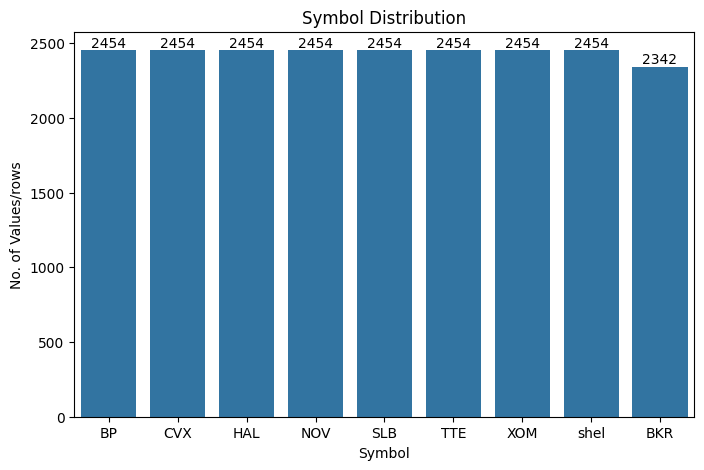

In [90]:
temp=pd.DataFrame(Main_data[['Symbol','Symbol_label']].value_counts()).reset_index()
plt.figure(figsize=(8, 5))
ax=sns.barplot(temp,x='Symbol',y='count')
ax.bar_label(ax.containers[0], fontsize=10)

plt.xlabel('Symbol')
plt.ylabel('No. of Values/rows')
plt.title('Symbol Distribution')


In [91]:
temp

,Symbol,Symbol_label,count
0,BP,1,2454
1,CVX,2,2454
2,HAL,3,2454
3,NOV,4,2454
4,SLB,5,2454
5,TTE,6,2454
6,XOM,7,2454
7,shel,8,2454
8,BKR,0,2342


C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\476459979.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  perc.append(   round( row[2]/temp['count'].sum() ,3  )*100)
C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\476459979.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(temp,x='Close/Last Classification',y='count',palette='hls',ax=axes[0])
C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\476459979.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(temp,x='Close/Last Classification',

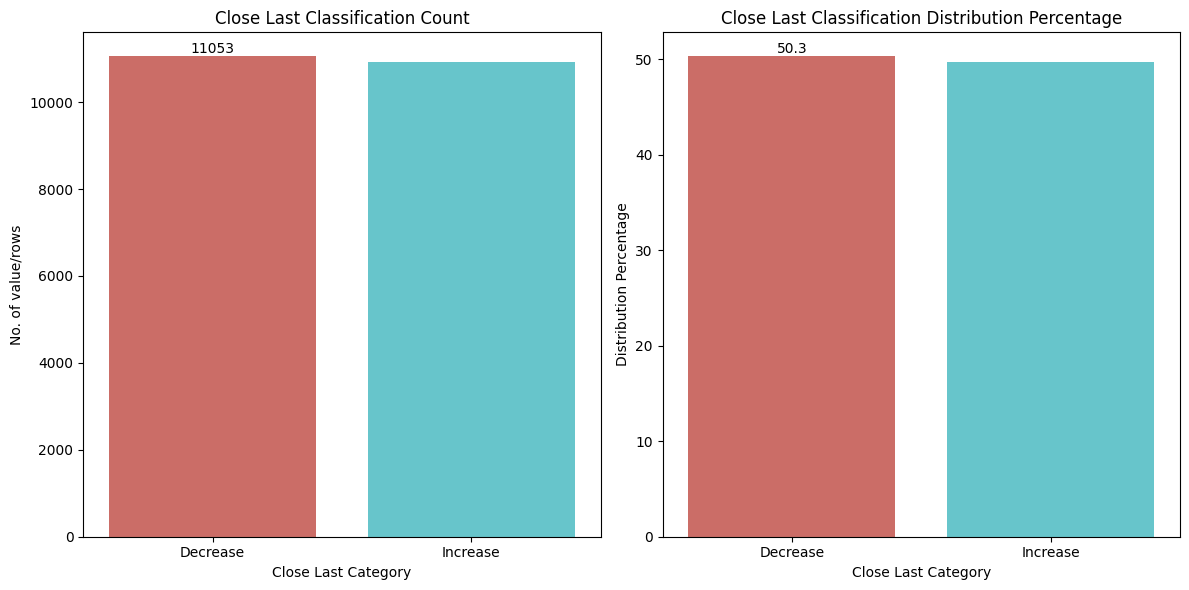

In [92]:
temp=pd.DataFrame(Main_data[['Close/Last Classification','Close Label']].value_counts()).reset_index()
perc=[]

for index, row in temp.iterrows():
      perc.append(   round( row[2]/temp['count'].sum() ,3  )*100)

temp['perc']=perc
temp

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Subplot 1
ax=sns.barplot(temp,x='Close/Last Classification',y='count',palette='hls',ax=axes[0])
ax.bar_label(ax.containers[0], fontsize=10)
axes[0].set_title('Close Last Classification Count')
axes[0].set_xlabel('Close Last Category')  
axes[0].set_ylabel('No. of value/rows')  

# Subplot 2
ax=sns.barplot(temp,x='Close/Last Classification',y='perc',palette='hls',ax=axes[1])
ax.bar_label(ax.containers[0], fontsize=10)
axes[1].set_title('Close Last Classification Distribution Percentage')
axes[1].set_xlabel('Close Last Category')  
axes[1].set_ylabel('Distribution Percentage')  

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [93]:
temp

,Close/Last Classification,Close Label,count,perc
0,Decrease,0,11053,50.3
1,Increase,1,10921,49.7


In [94]:
Main_data.columns.difference(['Symbol','Date'])

Index(['Close Label', 'Close/Last', 'Close/Last Classification', 'Day',
       'EBIDTA in millions', 'EPS', 'FEDFUNDS', 'GDP', 'GP in Millions',
       'High', 'Low', 'Month', 'Net income in millions', 'Oil-Close/Last',
       'Oil-High', 'Oil-Low', 'Oil-Open', 'Oil-Volume', 'Oil-Volume Lagged',
       'Open', 'Qtr Revenue in millions', 'Shares Outstanding',
       'Steel Production', 'Symbol_label', 'Unemployment Rate', 'Volume',
       'Volume Lagged', 'YC Ratio Wallstreet', 'YC Ratio arturo', 'Year',
       'operating income in millions'],
      dtype='object')

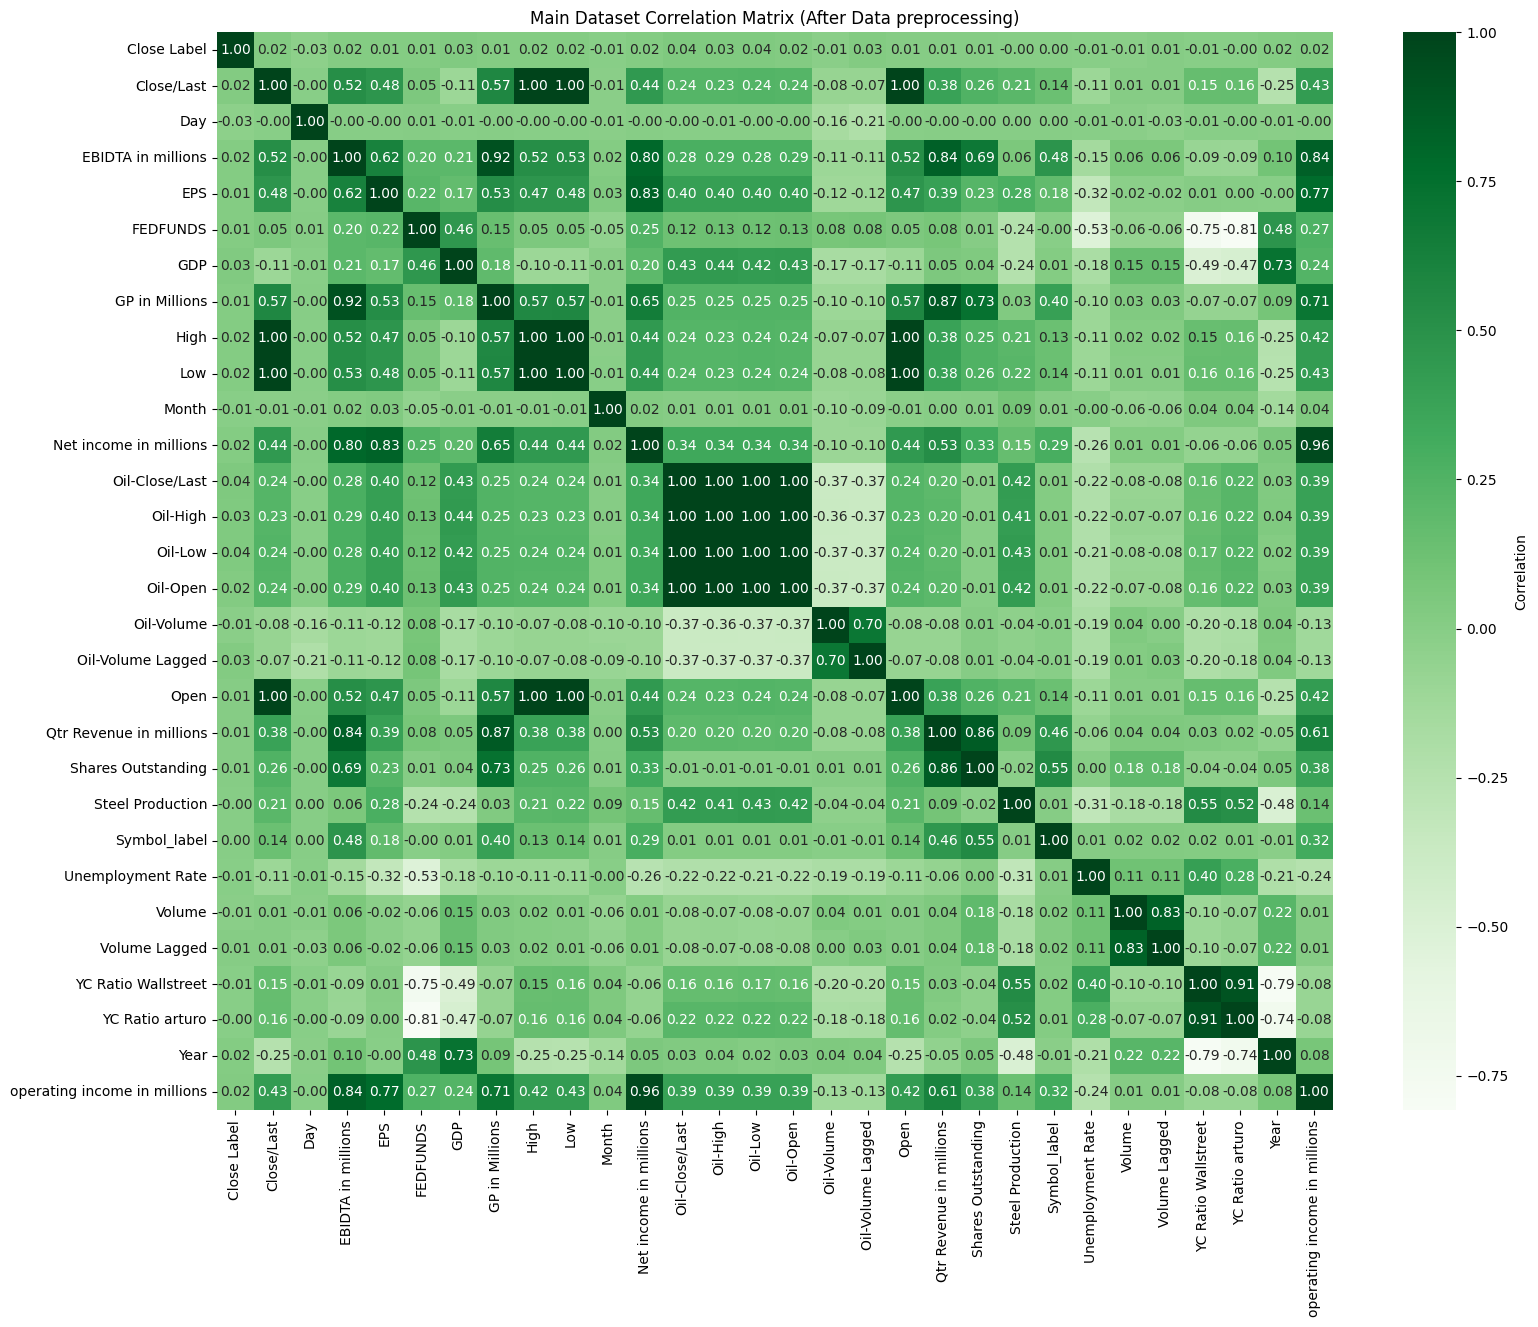

In [95]:
plt.figure(figsize=(18, 14))
sns.heatmap(Main_data[Main_data.columns.difference(['Symbol','Date','Close/Last Classification'])].corr(), cmap='Greens', annot=True, fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title("Main Dataset Correlation Matrix (After Data preprocessing)")
plt.show()

In [96]:
Main_data[Main_data.columns.difference(['Symbol','Date','Close/Last Classification'])].corr()['Close/Last'].to_excel("Output Data/Target Variable Correlation.xlsx")

In [97]:
Main_data.columns

Index(['Date', 'Symbol', 'Close/Last', 'Volume', 'Open', 'High', 'Low',
       'Volume Lagged', 'Oil-Close/Last', 'Oil-Volume', 'Oil-Open', 'Oil-High',
       'Oil-Low', 'Oil-Volume Lagged', 'FEDFUNDS', 'Unemployment Rate', 'GDP',
       'EPS', 'Qtr Revenue in millions', 'GP in Millions',
       'operating income in millions', 'EBIDTA in millions',
       'Net income in millions', 'Shares Outstanding', 'Steel Production',
       'YC Ratio arturo', 'YC Ratio Wallstreet', 'Year', 'Month', 'Day',
       'Close/Last Classification', 'Symbol_label', 'Close Label'],
      dtype='object')

In [98]:
# selecting high correlation columns
Columns_to_drop=['Shares Outstanding', 'Net income in millions', 'GP in Millions',
                 'Qtr Revenue in millions','Oil-Close/Last','Oil-High', 'Oil-Low','High','Low','Open' ,'Volume','Oil-Volume',
                 'operating income in millions','Year']
# Dropping high correlation columns
Main_data=Main_data[Main_data.columns.difference(Columns_to_drop)]

# removing high correlation columns from value columns list
try:
    for col in Columns_to_drop:
            print(col)
            value_columns.remove(col)
except:
      None

value_columns

Shares Outstanding
Net income in millions
GP in Millions
Qtr Revenue in millions
Oil-Close/Last
Oil-High
Oil-Low
High
Low
Open
Volume
Oil-Volume
operating income in millions
Year


['Close/Last',
 'Oil-Open',
 'FEDFUNDS',
 'Unemployment Rate',
 'GDP',
 'EPS',
 'EBIDTA in millions',
 'YC Ratio arturo',
 'YC Ratio Wallstreet',
 'Steel Production',
 'Volume Lagged',
 'Oil-Volume Lagged']

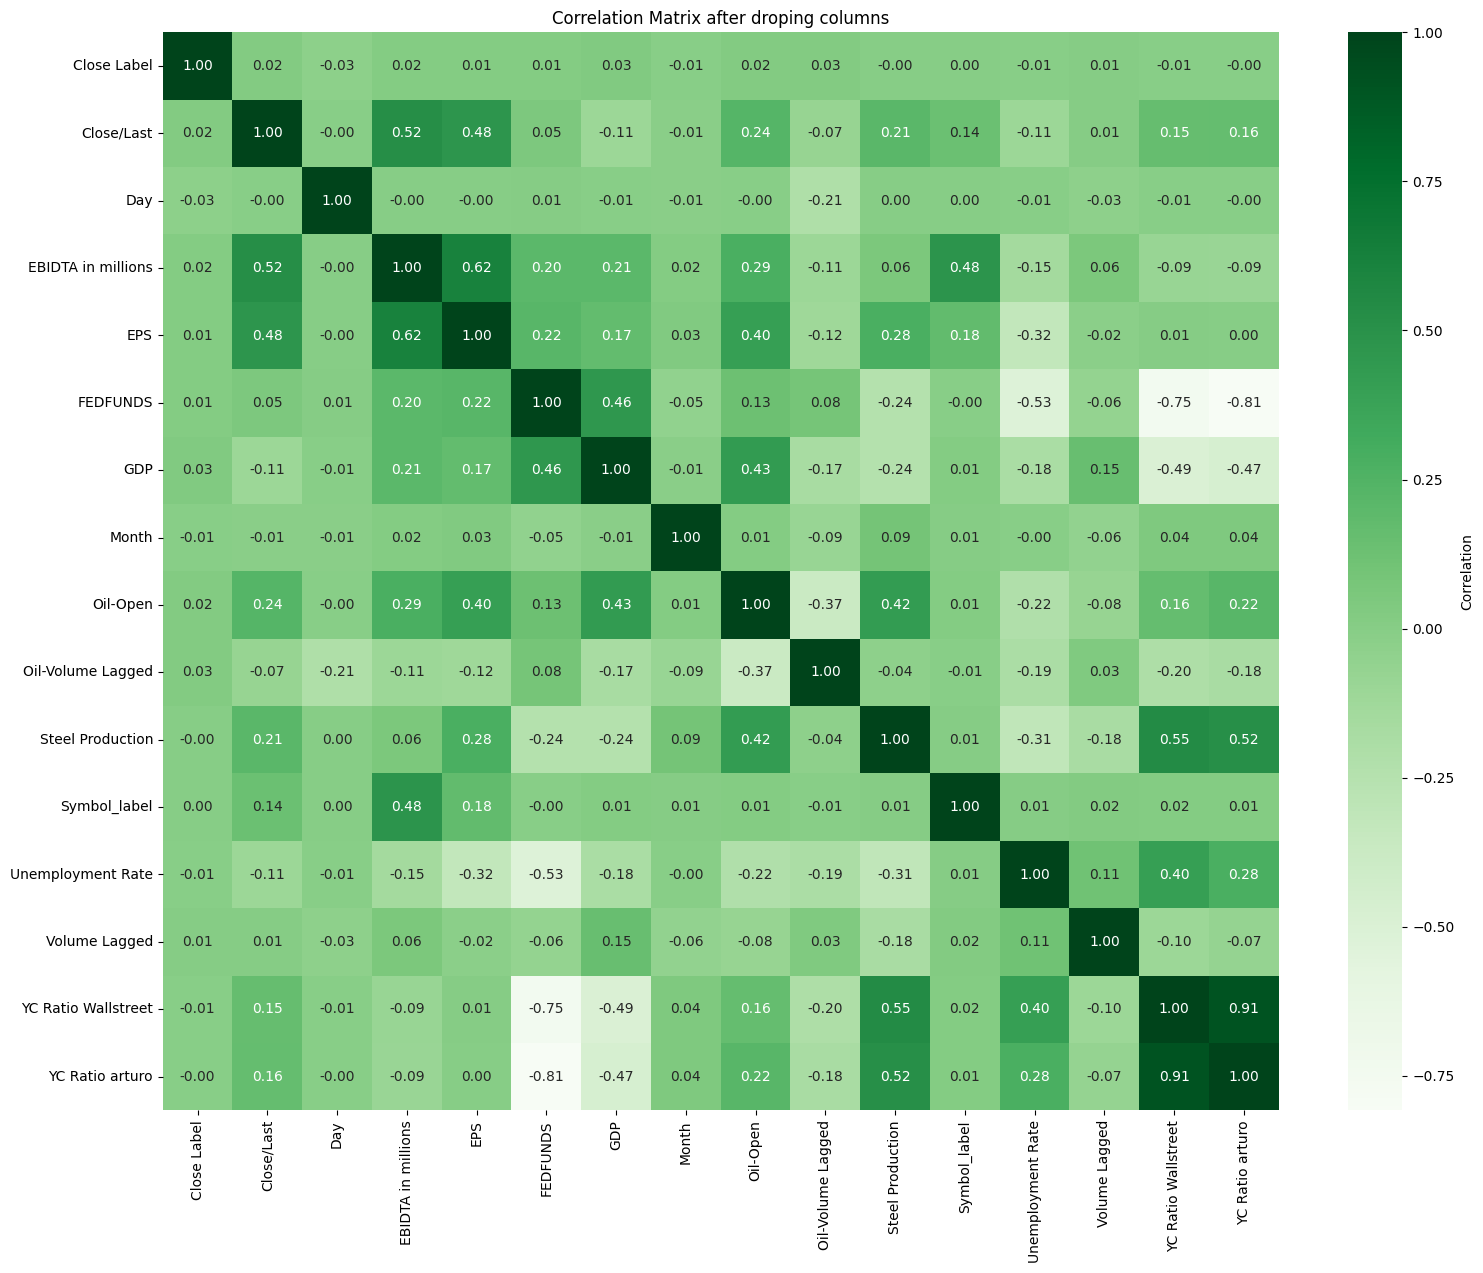

In [99]:
plt.figure(figsize=(18, 14))
sns.heatmap(Main_data[Main_data.columns.difference(['Symbol','Date','Close/Last Classification'])].corr(), cmap='Greens', annot=True, fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix after droping columns")
plt.show()

In [100]:
Main_data.columns

Index(['Close Label', 'Close/Last', 'Close/Last Classification', 'Date', 'Day',
       'EBIDTA in millions', 'EPS', 'FEDFUNDS', 'GDP', 'Month', 'Oil-Open',
       'Oil-Volume Lagged', 'Steel Production', 'Symbol', 'Symbol_label',
       'Unemployment Rate', 'Volume Lagged', 'YC Ratio Wallstreet',
       'YC Ratio arturo'],
      dtype='object')

In [101]:
value_columns

['Close/Last',
 'Oil-Open',
 'FEDFUNDS',
 'Unemployment Rate',
 'GDP',
 'EPS',
 'EBIDTA in millions',
 'YC Ratio arturo',
 'YC Ratio Wallstreet',
 'Steel Production',
 'Volume Lagged',
 'Oil-Volume Lagged']

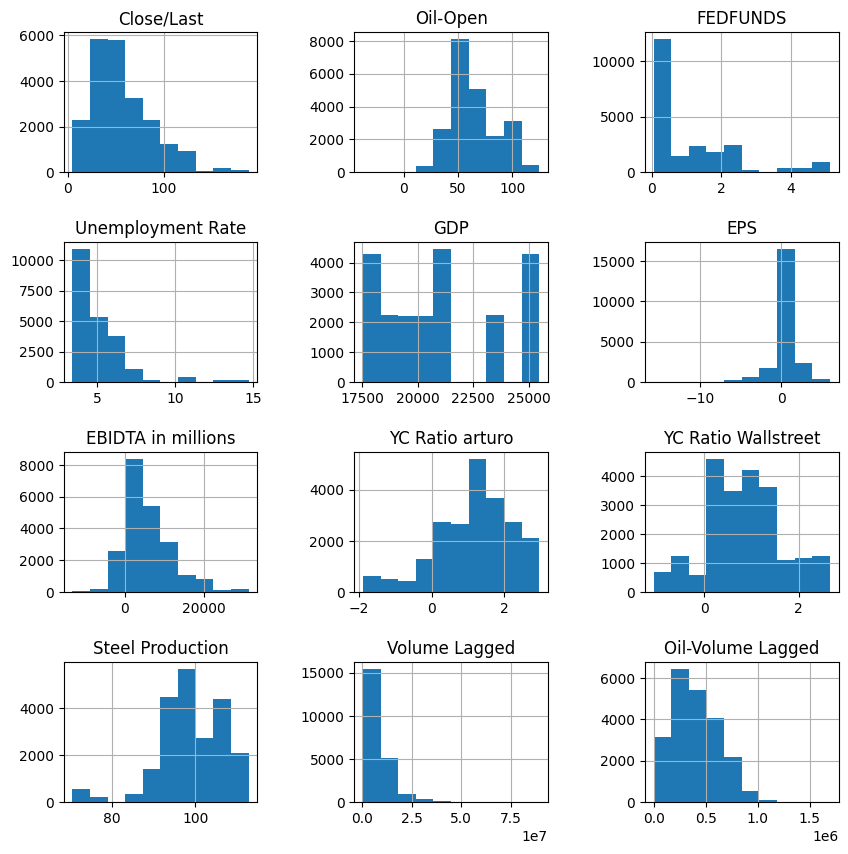

In [102]:
# header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
Main_data.hist(column=value_columns,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [103]:
# Main_data.plot(kind='box',figsize=(20,5))

In [104]:
# print(Main_data.shape)
# Main_data=Main_data[Main_data['EBIDTA in millions']<22000]

# Main_data.plot(kind='box',figsize=(20,5))

In [105]:
# print(Main_data.shape)
# Main_data=Main_data[Main_data['GDP']<24000]

# Main_data.plot(kind='box',figsize=(20,5))

In [106]:
# Main_data[Main_data.columns.difference(['EBIDTA in millions','GDP'])]

In [107]:
# Main_data[Main_data.columns.difference(['EBIDTA in millions','GDP','Year'])].plot(kind='box',figsize=(20,5))

In [108]:
Main_data['FEDFUNDS'].describe()

count    21974.000000
mean         1.063677
std          1.299889
min          0.050000
25%          0.090000
50%          0.390000
75%          1.700000
max          5.120000
Name: FEDFUNDS, dtype: float64

In [109]:
Main_data.head()

,Close Label,Close/Last,Close/Last Classification,Date,Day,EBIDTA in millions,EPS,FEDFUNDS,GDP,Month,Oil-Open,Oil-Volume Lagged,Steel Production,Symbol,Symbol_label,Unemployment Rate,Volume Lagged,YC Ratio Wallstreet,YC Ratio arturo
123,0,53.590000,Decrease,2014-01-03,3,918.0,0.56,0.07,17550.68,1,95.47,234933.0,106.6961,BKR,0,6.6,3475200.0,2.60,2.94
124,0,53.400002,Decrease,2014-01-06,6,918.0,0.56,0.07,17550.68,1,94.18,196347.0,106.6961,BKR,0,6.6,3195400.0,2.58,2.93
125,0,52.790001,Decrease,2014-01-07,7,918.0,0.56,0.07,17550.68,1,93.60,172625.0,106.6961,BKR,0,6.6,2940300.0,2.56,2.92
126,0,52.209999,Decrease,2014-01-08,8,918.0,0.56,0.07,17550.68,1,93.96,159884.0,106.6961,BKR,0,6.6,4494200.0,2.58,2.96
127,0,51.820000,Decrease,2014-01-09,9,918.0,0.56,0.07,17550.68,1,92.58,215605.0,106.6961,BKR,0,6.6,5122500.0,2.53,2.93


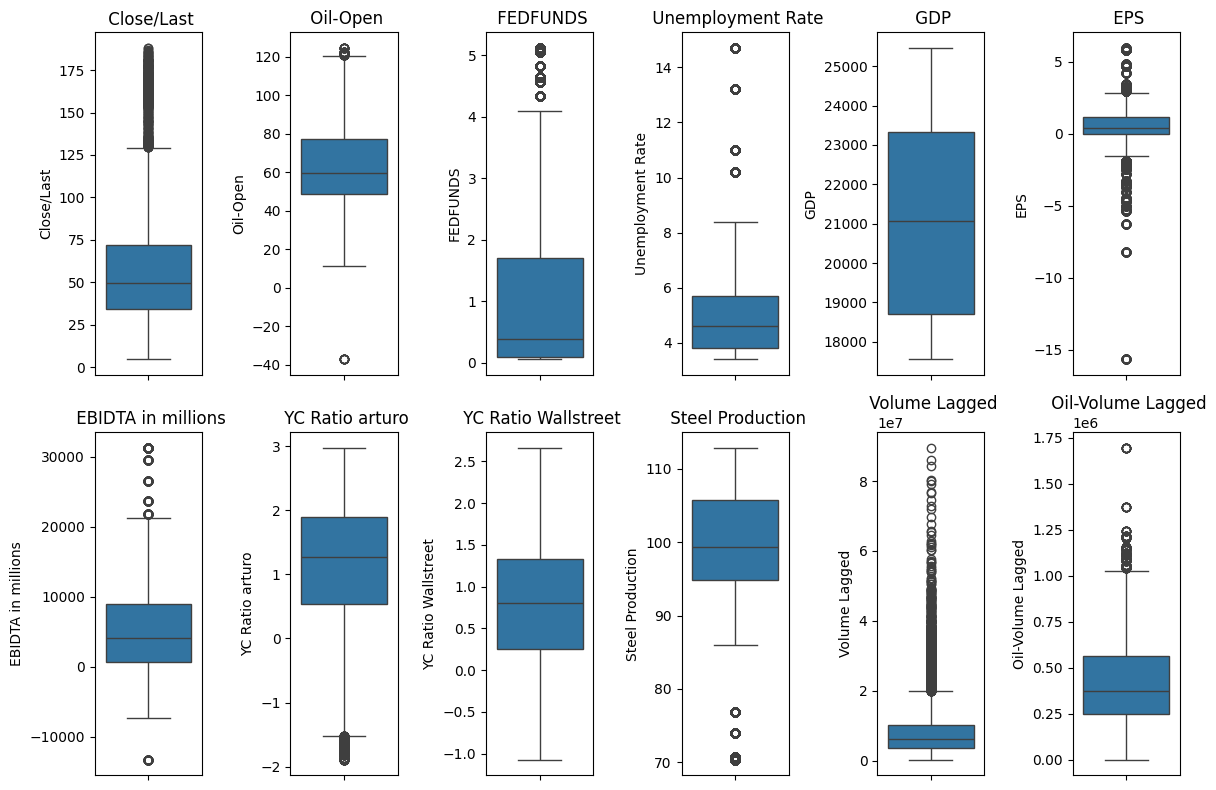

In [110]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 8))

# Plot each column in a separate subplot
n = 0
nn = 0
for i, column in enumerate(Main_data[value_columns].columns):
    if n == 6:
        n = 0
        nn = 1  # Move to the second row


    sns.boxplot(Main_data[column], ax=axes[nn, n],orient='v')
    
    axes[nn, n].set_title(f' {column}')

    # Increment the column index
    n = n + 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [111]:
Main_data['Close/Last'].describe()

count    21974.000000
mean        56.346509
std         30.732846
min          4.610000
25%         34.222500
50%         49.830000
75%         72.297500
max        188.050000
Name: Close/Last, dtype: float64

In [112]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
# print(Main_data.shape)
# ax=sns.boxplot(Main_data['Close/Last'],ax=axes[0])
# axes[0].set_title('Before Removing Outliers')

# Main_data=Main_data[Main_data['Close/Last']<120]

# ax=sns.boxplot(Main_data['Close/Last'],ax=axes[1])
# axes[1].set_title('After Removing Outliers')

# plt.tight_layout(pad=1.0)
# plt.show()
# print(Main_data.shape)

In [113]:
Main_data['Volume Lagged']=Main_data['Volume Lagged'].astype('int')
description = Main_data['Volume Lagged'].describe()

print("Count:", description['count'])
print("Mean:", description['mean'])
print("Std:", description['std'])
print("Min:", description['min'])
print("25%:", description['25%'])
print("50%:", description['50%'])
print("75%:", description['75%'])
print("Max:", description['max'])

Count: 21974.0
Mean: 7941140.278192409
Std: 6698039.147572102
Min: 342093.0
25%: 3597040.0
50%: 6257157.5
75%: 10161975.0
Max: 89460780.0


C:\Users\nasif\AppData\Local\Temp\ipykernel_15476\1347231665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Main_data['Volume Lagged']=Main_data['Volume Lagged'].astype('int')


(21974, 19)


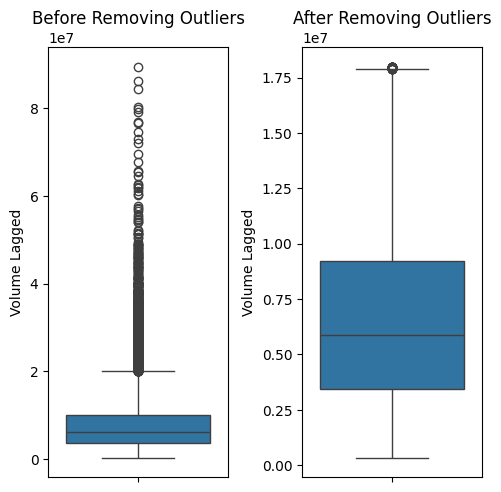

(20533, 19)


In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
print(Main_data.shape)
ax=sns.boxplot(Main_data['Volume Lagged'],ax=axes[0])
axes[0].set_title('Before Removing Outliers')

Main_data=Main_data[Main_data['Volume Lagged']< 18000000] 

ax=sns.boxplot(Main_data['Volume Lagged'],ax=axes[1])
axes[1].set_title('After Removing Outliers')

plt.tight_layout(pad=1.0)
plt.show()
print(Main_data.shape)

In [115]:
Main_data['Oil-Open'].describe()

count    20533.000000
mean        64.687096
std         21.046468
min        -37.250000
25%         48.790000
50%         59.550000
75%         77.350000
max        124.580000
Name: Oil-Open, dtype: float64

In [116]:
Main_data['Oil-Open'].max()

124.58

Text(0.5, 1.0, 'Oil-Open Histogram')

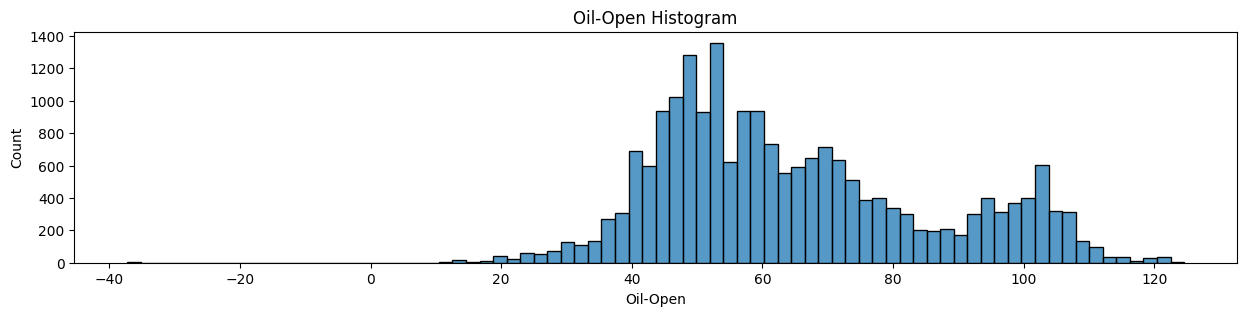

In [117]:
plt.figure(figsize=(15, 3))
sns.histplot(Main_data['Oil-Open'])
plt.title("Oil-Open Histogram")

(20533, 19)


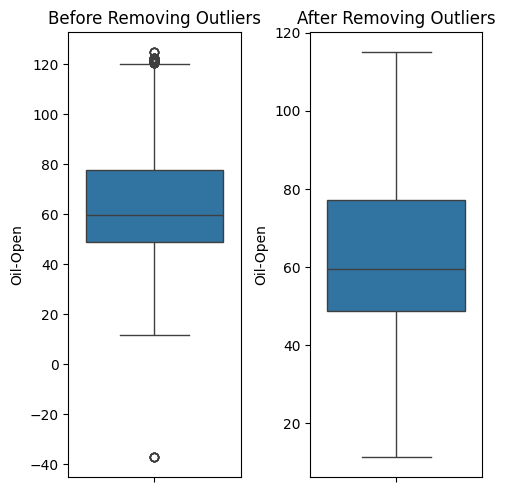

(20431, 19)


In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
print(Main_data.shape)
ax=sns.boxplot(Main_data['Oil-Open'],ax=axes[0])
axes[0].set_title('Before Removing Outliers')

Main_data=Main_data[Main_data['Oil-Open']<115]
Main_data=Main_data[Main_data['Oil-Open']>0]

ax=sns.boxplot(Main_data['Oil-Open'],ax=axes[1])
axes[1].set_title('After Removing Outliers')

plt.tight_layout(pad=1.0)
plt.show()
print(Main_data.shape)

Text(0.5, 1.0, 'FEDFUNDS Histogram')

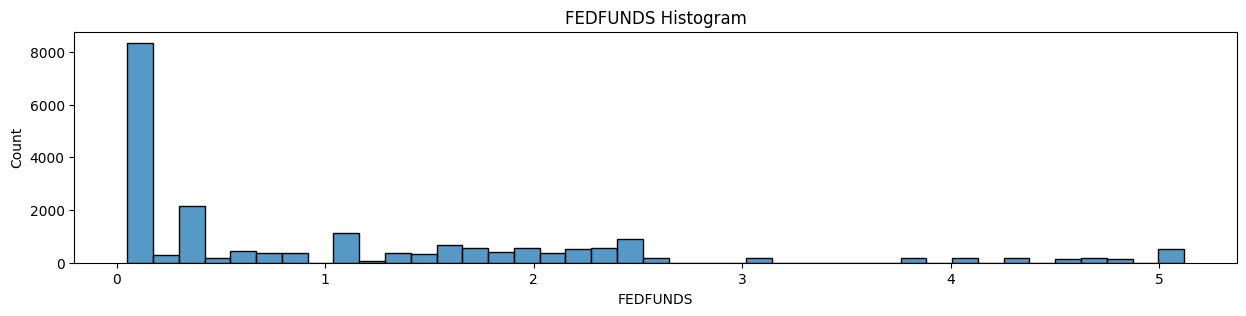

In [119]:
plt.figure(figsize=(15, 3))
sns.histplot(Main_data['FEDFUNDS'])
plt.title("FEDFUNDS Histogram")

(20431, 19)


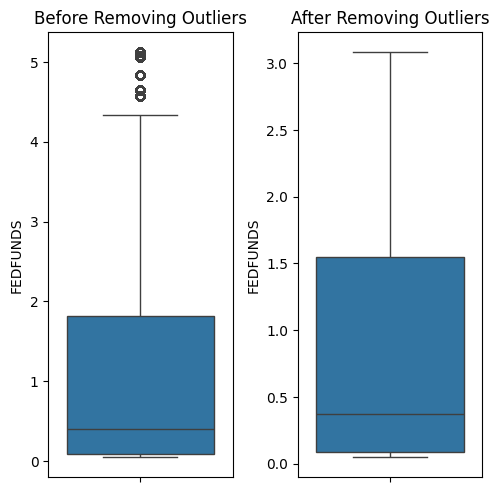

(18866, 19)


In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
print(Main_data.shape)
ax=sns.boxplot(Main_data['FEDFUNDS'],ax=axes[0])
axes[0].set_title('Before Removing Outliers')

Main_data=Main_data[Main_data['FEDFUNDS']<3.78]

ax=sns.boxplot(Main_data['FEDFUNDS'],ax=axes[1])
axes[1].set_title('After Removing Outliers')

plt.tight_layout(pad=1.0)
plt.show()
print(Main_data.shape)

Text(0.5, 1.0, 'Unemployment Rate Histogram')

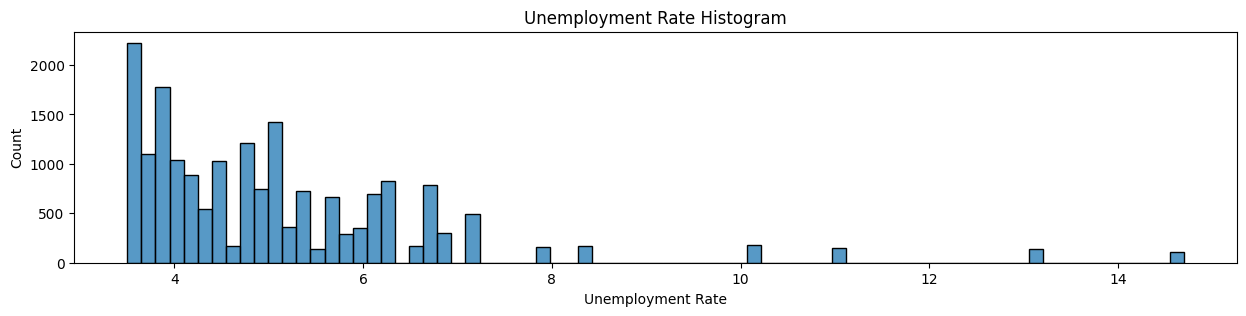

In [121]:
plt.figure(figsize=(15, 3))
sns.histplot(Main_data['Unemployment Rate'])
plt.title("Unemployment Rate Histogram")

(18866, 19)


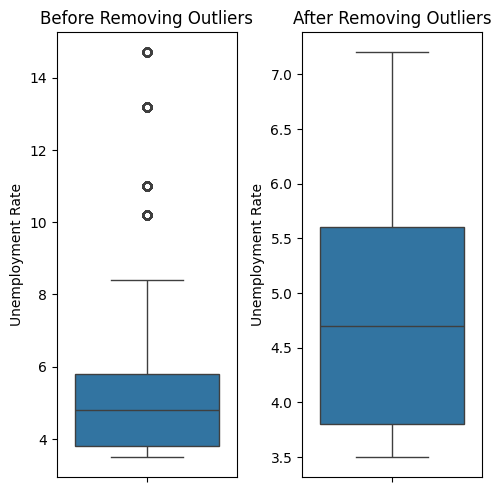

(17962, 19)


In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
print(Main_data.shape)
ax=sns.boxplot(Main_data['Unemployment Rate'],ax=axes[0])
axes[0].set_title('Before Removing Outliers')

Main_data=Main_data[Main_data['Unemployment Rate']<7.9]

ax=sns.boxplot(Main_data['Unemployment Rate'],ax=axes[1])
axes[1].set_title('After Removing Outliers')

plt.tight_layout(pad=1.0)
plt.show()
print(Main_data.shape)

Text(0.5, 1.0, 'EPS Histogram')

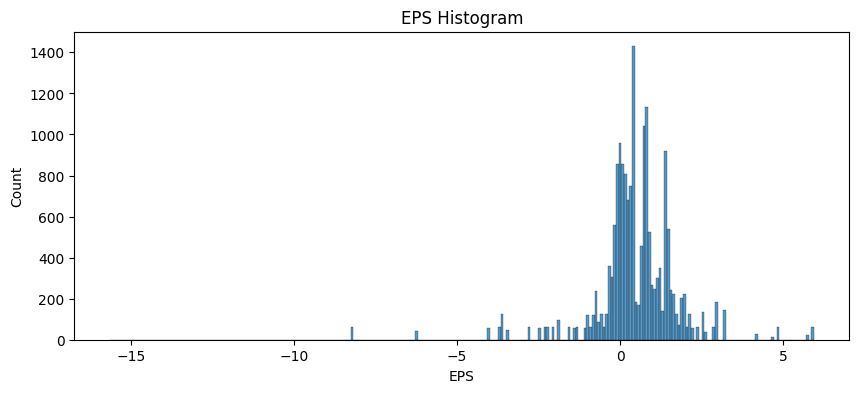

In [123]:
plt.figure(figsize=(10, 4))
sns.histplot(Main_data['EPS'])
plt.title("EPS Histogram")

(17962, 19)


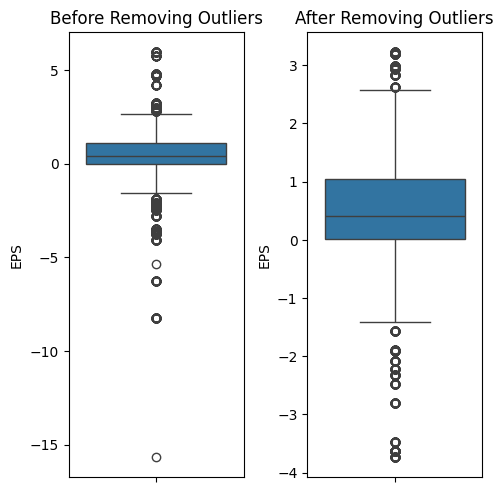

(17607, 19)


In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
print(Main_data.shape)
ax=sns.boxplot(Main_data['EPS'],ax=axes[0])
axes[0].set_title('Before Removing Outliers')

Main_data=Main_data[(Main_data['EPS']<4) & (Main_data['EPS']>-4)]

ax=sns.boxplot(Main_data['EPS'],ax=axes[1])
axes[1].set_title('After Removing Outliers')

plt.tight_layout(pad=1.0)
plt.show()
print(Main_data.shape)

Text(0.5, 1.0, 'EPS Histogram')

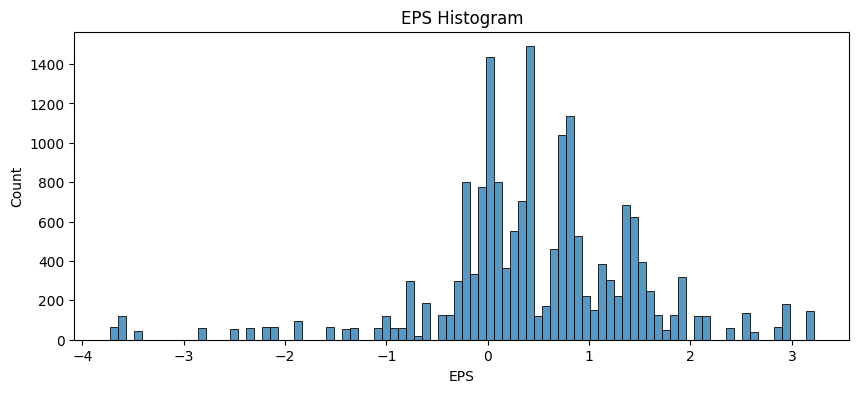

In [125]:
plt.figure(figsize=(10, 4))
sns.histplot(Main_data['EPS'])
plt.title("EPS Histogram")

(17607, 19)


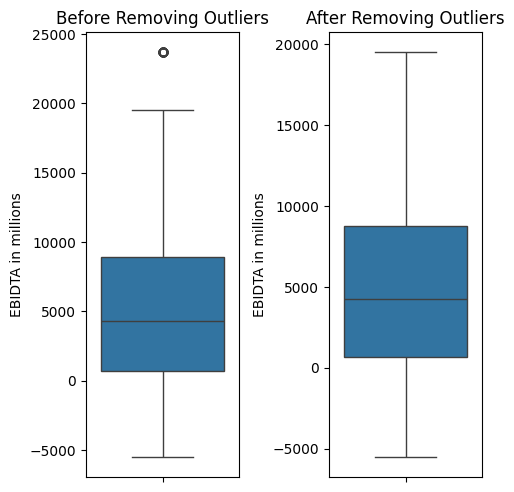

(17548, 19)


In [126]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
print(Main_data.shape)
ax=sns.boxplot(Main_data['EBIDTA in millions'],ax=axes[0])
axes[0].set_title('Before Removing Outliers')

Main_data=Main_data[Main_data['EBIDTA in millions']<23600]

ax=sns.boxplot(Main_data['EBIDTA in millions'],ax=axes[1])
axes[1].set_title('After Removing Outliers')

plt.tight_layout(pad=1.0)
plt.show()
print(Main_data.shape)

(17548, 19)


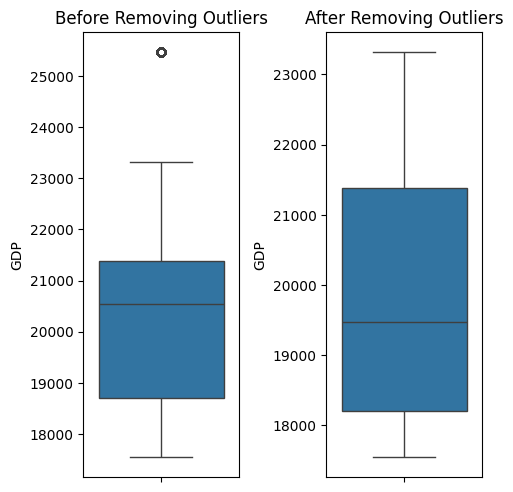

(15586, 19)


In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
print(Main_data.shape)
ax=sns.boxplot(Main_data['GDP'],ax=axes[0])
axes[0].set_title('Before Removing Outliers')

Main_data=Main_data[Main_data['GDP']<25450]

ax=sns.boxplot(Main_data['GDP'],ax=axes[1])
axes[1].set_title('After Removing Outliers')

plt.tight_layout(pad=1.0)
plt.show()
print(Main_data.shape)

Text(0.5, 1.0, 'Oil-Volume Histogram')

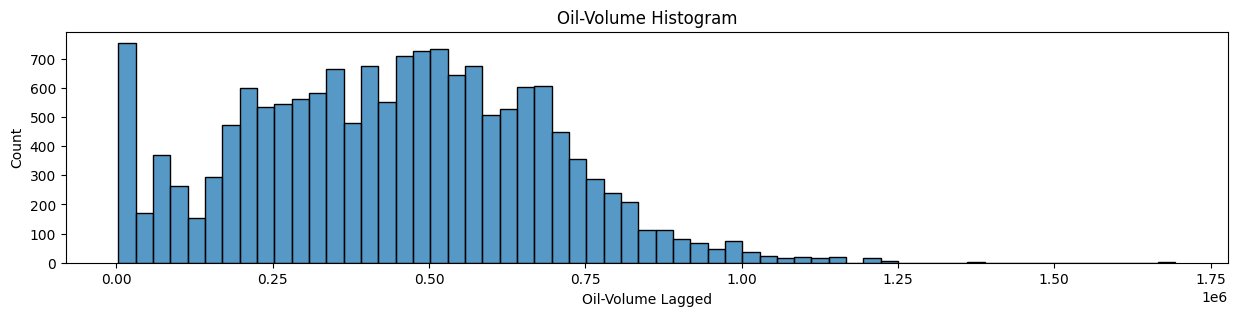

In [128]:
plt.figure(figsize=(15, 3))
sns.histplot(Main_data['Oil-Volume Lagged'])
plt.title("Oil-Volume Histogram")

(15586, 19)


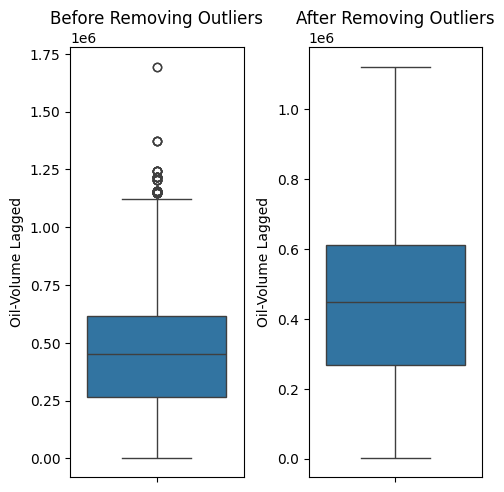

(15540, 19)


In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
print(Main_data.shape)
ax=sns.boxplot(Main_data['Oil-Volume Lagged'],ax=axes[0])
axes[0].set_title('Before Removing Outliers')

Main_data=Main_data[Main_data['Oil-Volume Lagged']< 1140000 ]

ax=sns.boxplot(Main_data['Oil-Volume Lagged'],ax=axes[1])
axes[1].set_title('After Removing Outliers')

plt.tight_layout(pad=1.0)
plt.show()
print(Main_data.shape)

Text(0.5, 1.0, 'Oil-Volume Histogram')

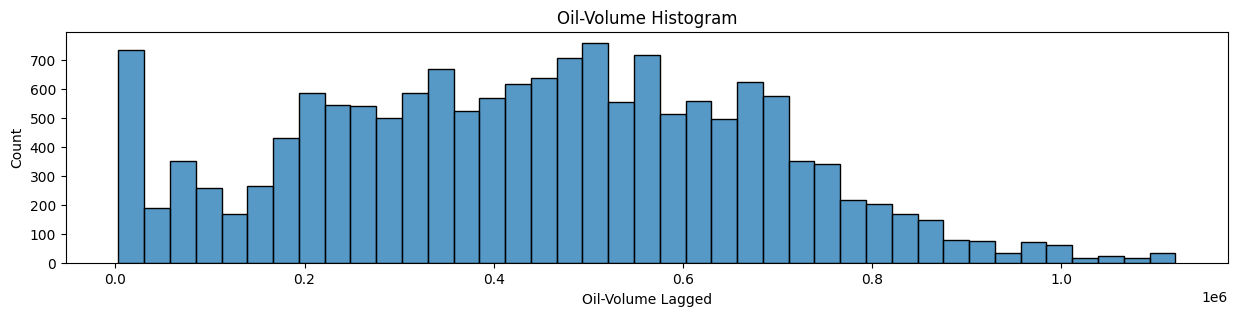

In [130]:
plt.figure(figsize=(15, 3))
sns.histplot(Main_data['Oil-Volume Lagged'])
plt.title("Oil-Volume Histogram")

In [131]:
Main_data['Oil-Volume Lagged']

description = Main_data['Oil-Volume Lagged'].describe()

print("Count:", description['count'])
print("Mean:", description['mean'])
print("Std:", description['std'])
print("Min:", description['min'])
print("25%:", description['25%'])
print("50%:", description['50%'])
print("75%:", description['75%'])
print("Max:", description['max'])

Count: 15540.0
Mean: 442178.0307593308
Std: 231060.75397167716
Min: 3363.0
25%: 266875.0
50%: 449468.0
75%: 611679.0
Max: 1120315.0


sns.boxplot(Main_data['Oil'])

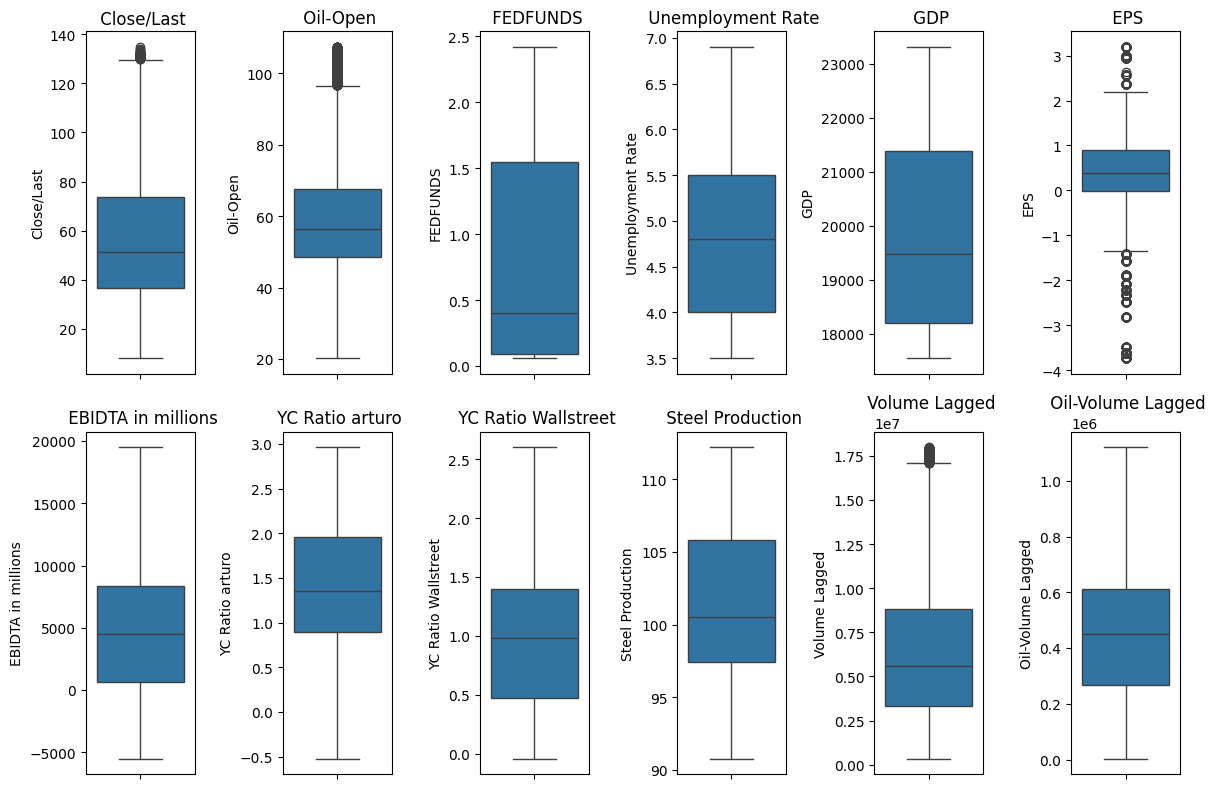

In [132]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 8))

# Plot each column in a separate subplot
n = 0
nn = 0
for i, column in enumerate(Main_data[value_columns].columns):
    if n == 6:
        n = 0
        nn = 1  # Move to the second row


    sns.boxplot(Main_data[column], ax=axes[nn, n],orient='v')
    
    axes[nn, n].set_title(f' {column}')

    # Increment the column index
    n = n + 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Symbol Distribution')

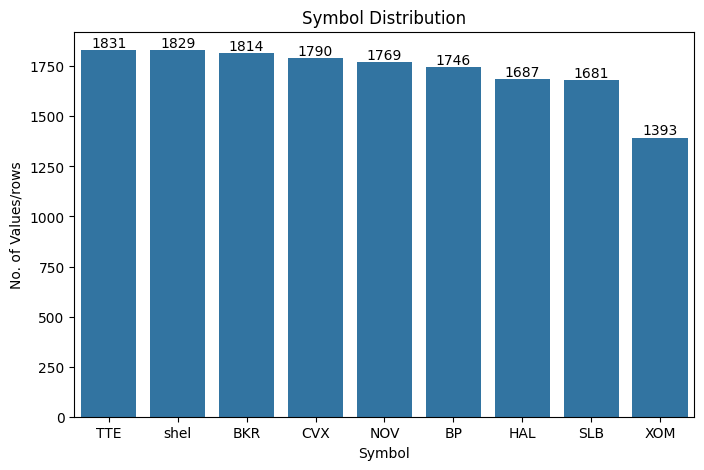

In [221]:
temp=pd.DataFrame(Main_data[['Symbol','Symbol_label']].value_counts()).reset_index()
plt.figure(figsize=(8, 5))
ax=sns.barplot(temp,x='Symbol',y='count')
ax.bar_label(ax.containers[0], fontsize=10)

plt.xlabel('Symbol')
plt.ylabel('No. of Values/rows')
plt.title('Symbol Distribution')


C:\Users\nasif\AppData\Local\Temp\ipykernel_24548\3979773059.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  perc.append(   round( row[2]/temp['count'].sum() ,3  )*100)
C:\Users\nasif\AppData\Local\Temp\ipykernel_24548\3979773059.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(temp,x='Close/Last Classification',y='count',palette='bright',ax=axes[0])
C:\Users\nasif\AppData\Local\Temp\ipykernel_24548\3979773059.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(temp,x='Close/Last Classifica

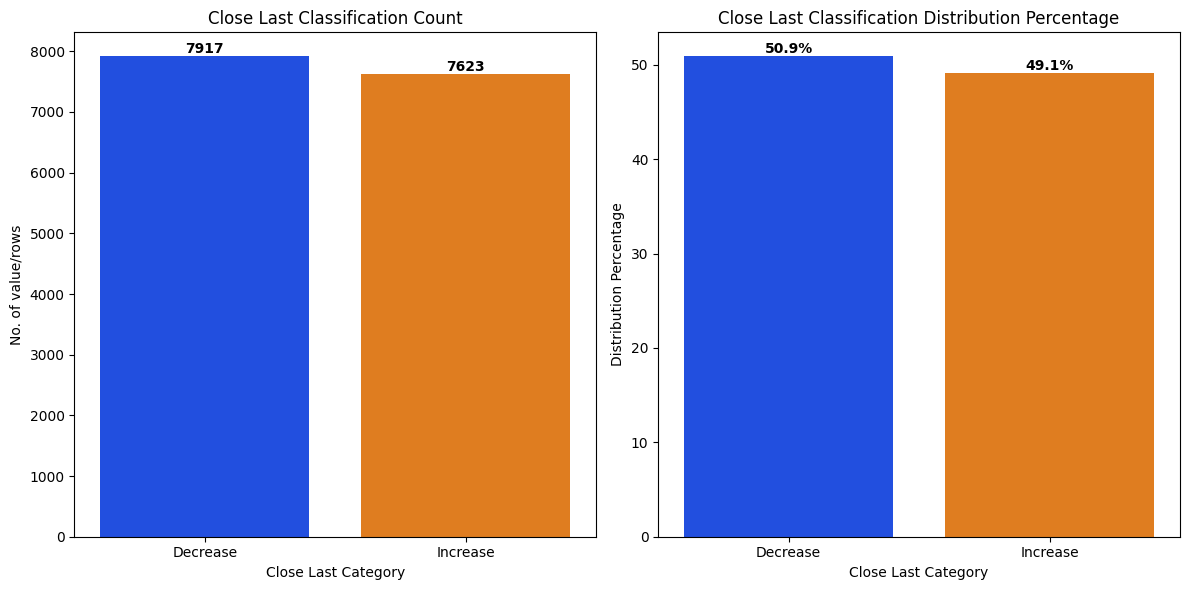

In [357]:
temp=pd.DataFrame(Main_data[['Close/Last Classification','Close Label']].value_counts()).reset_index()
perc=[]

for index, row in temp.iterrows():
      perc.append(   round( row[2]/temp['count'].sum() ,3  )*100)

temp['perc']=perc
temp

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Subplot 1
ax=sns.barplot(temp,x='Close/Last Classification',y='count',palette='bright',ax=axes[0])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', weight='bold')
axes[0].set_title('Close Last Classification Count')
axes[0].set_xlabel('Close Last Category')  
axes[0].set_ylabel('No. of value/rows')  

# Subplot 2
ax=sns.barplot(temp,x='Close/Last Classification',y='perc',palette='bright',ax=axes[1])

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, color='black', label_type='edge', weight='bold')
# ax.bar_label(ax.containers[0], fontsize=10, fmt='%.1f%%') 
axes[1].set_title('Close Last Classification Distribution Percentage')
axes[1].set_xlabel('Close Last Category')  
axes[1].set_ylabel('Distribution Percentage')  

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\nasif\AppData\Local\Temp\ipykernel_24548\3641647810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(temp,x='Symbol',y='count',palette='bright')


Text(0.5, 1.0, 'Company Symbol/Ticker Distribution')

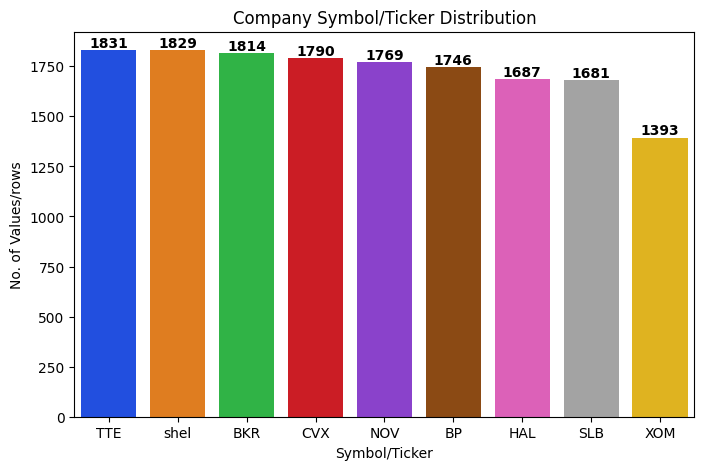

In [363]:
temp=pd.DataFrame(Main_data[['Symbol','Symbol_label']].value_counts()).reset_index()
plt.figure(figsize=(8, 5))
ax=sns.barplot(temp,x='Symbol',y='count',palette='bright')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', weight='bold')

plt.xlabel('Symbol/Ticker')
plt.ylabel('No. of Values/rows')
plt.title('Company Symbol/Ticker Distribution')


In [ ]:
# Main_data.drop(columns='Date',axis=1,inplace=True)
Main_data.to_excel("Output Data\Main Data.xlsx",index=False)